# Examen 1

## Importaciones necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import random
from scipy import optimize as opt

## Punto 1

JSON de nombre "countries.json" descargado del siguiente link:
https://gist.githubusercontent.com/keeguon/2310008/raw/bdc2ce1c1e3f28f9cab5b4393c7549f38361be4e/countries.

In [ ]:
CountriesAPI = "https://inspirehep.net/api/institutions?q=chile"
DatosPais = pd.read_json(CountriesAPI)

Paso por toda la informacion optenida para poder saber cuales tienen paper mayores a 0

In [ ]:
opciones = []
for i in range(0, len(DatosPais["hits"]["hits"])):
    validador = DatosPais["hits"]["hits"][i]["metadata"]["number_of_papers"]
    if validador > 0:
        opciones.append(i)

La primera opcion contiene los papers, por ende cumple con las condiciones para buscarle el "legacy_ICN"

In [ ]:
DatosPais["hits"]["hits"][opciones[5]]["metadata"]["number_of_papers"]

Obteniendo la informacion de "legacy_ICN"

In [ ]:
legacy_ICN = DatosPais["hits"]["hits"][opciones[0]]["metadata"]["legacy_ICN"]
legacy_ICN

In [ ]:
ajuste_legacy_ICN = legacy_ICN[0:21].replace(" ","+")
ajuste_legacy_ICN

Descargando el siguiente archivo JSON, con los artículos de menos de 10 autores usando el "legacy_ICN"

In [ ]:
AuthorsAPI = "https://inspirehep.net/api/literature?page=1&q=aff+U.+Chile,+Santiago+and+ac+1-%3E+10"
DatosAuthor = pd.read_json(AuthorsAPI)

In [ ]:
DatosAuthor["hits"]["hits"][2]["metadata"]["authors"][0]["record"]["$ref"]

Busqueda y creación del dataframe

In [32]:
NombreAuthor = []
CorreoAuthor = []
# No entendi este asi que no sé que buscar exactamente
Position = []
# --------------
Rango = []
Institution = []
FechaInicio = []
FechaFinalizacion = []

In [33]:
for i in range(0,len(DatosAuthor["hits"]["hits"])):
    for j in range(0,len(DatosAuthor["hits"]["hits"][i]["metadata"]["authors"])):
        NombreAuthor.append(DatosAuthor["hits"]["hits"][i]["metadata"]["authors"][j]["full_name"])
        try:
            LinkAuthor = DatosAuthor["hits"]["hits"][i]["metadata"]["authors"][j]["record"]["$ref"]
            try:
                CorreoAuthor.append(pd.read_json(LinkAuthor)["metadata"]["email_addresses"][0]["value"])
            except KeyError:
                CorreoAuthor.append(' - ')
            try:
                Rango.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["rank"])
            except KeyError:
                Rango.append(' - ')
            try:
                Institution.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["institution"])
            except KeyError:
                Institution.append(' - ') 
            try:
                FechaInicio.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["start_date"])
            except KeyError:
                FechaInicio.append(' - ')
            try:
                FechaFinalizacion.append(pd.read_json(LinkAuthor)["metadata"]["positions"][0]["end_date"])
            except KeyError:
                FechaFinalizacion.append(' - ') 
        except KeyError:
            CorreoAuthor.append('Sin acceso a $ref')
            Rango.append('Sin acceso a $ref')
            Institution.append("Sin acceso a $ref")
            FechaInicio.append('Sin acceso a $ref')
            FechaFinalizacion.append('Sin acceso a $ref')

In [34]:
print("Correo: ",len(CorreoAuthor))
print("Nombre: ",len(NombreAuthor))
print("Rango: ",len(Rango))
print("Insti: ",len(Institution))
print("Inicio: ",len(FechaInicio))
print("Final: ",len(FechaFinalizacion))

Correo:  26
Nombre:  26
Rango:  26
Insti:  26
Inicio:  26
Final:  26


In [35]:
ResumenDeLosDatos = {"Nombre":NombreAuthor,"Correo":CorreoAuthor,"Rango":Rango,"Institución":Institution,"Fecha de inicio":FechaInicio,"Fecha de finalizacion":FechaFinalizacion}

In [43]:
ElDataFrame = pd.DataFrame(ResumenDeLosDatos)
ElDataFrame

,Nombre,Correo,Rango,Institución,Fecha de inicio,Fecha de finalizacion
0,"Khadka, Narayan",nkhadka@phys.ksu.edu,PHD,"Kansas State U., Manhattan",-,-
1,"Martínez-Aldama, Mary Loli",-,-,-,-,-
2,"Zajaček, Michal",-,-,"Masaryk U., Brno",-,-
3,"Czerny, Bożena",bcz@cft.edu.pl,SENIOR,"Warsaw, CFT",2015,-
4,"Ratra, Bharat",ratra@phys.ksu.edu,SENIOR,Kansas State U.,1996,-
5,"Garban, Christophe",-,-,-,-,-
6,"Sepúlveda, Avelio",-,-,-,-,-
7,"Ávila, Ivania M.",ivania.maturana@edu.uai.cl,POSTDOC,Adolfo Ibanez U.,2021,-
8,"Cottin, Giovanna",giovanna.cottin@uai.cl,JUNIOR,Adolfo Ibanez U.,2020,-
9,"Díaz, Marco A.",mad@susy.fis.puc.cl,SENIOR,"Chile U., Catolica",1999,-


## Punto 2

Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación (Ejemplo: 98554575 → 3 raices reales aleatorias  entre 5 y 7 )

Cedula: 1214748203 -> 0 y 3

In [37]:
coef1 = random.uniform(0,3)
coef2 = random.uniform(0,3)
coef3 = random.uniform(0,3)

print("Raiz 1: ",coef1)
print("Raiz 2: ",coef2)
print("Raiz 3: ",coef3)

Raiz 1:  2.714383218504346
Raiz 2:  1.752108030427811
Raiz 3:  0.6762882015374648


Polinomio principal

In [38]:
Poli_3raiz = np.poly1d([1, (-1)*(coef1+coef2+coef3), coef1*coef2 + coef1*coef3 + coef2*coef3,(-1)*coef1*coef2*coef3])

In [39]:
Valx = np.linspace(0,4,100)

In [40]:
Valy = Poli_3raiz(Valx)

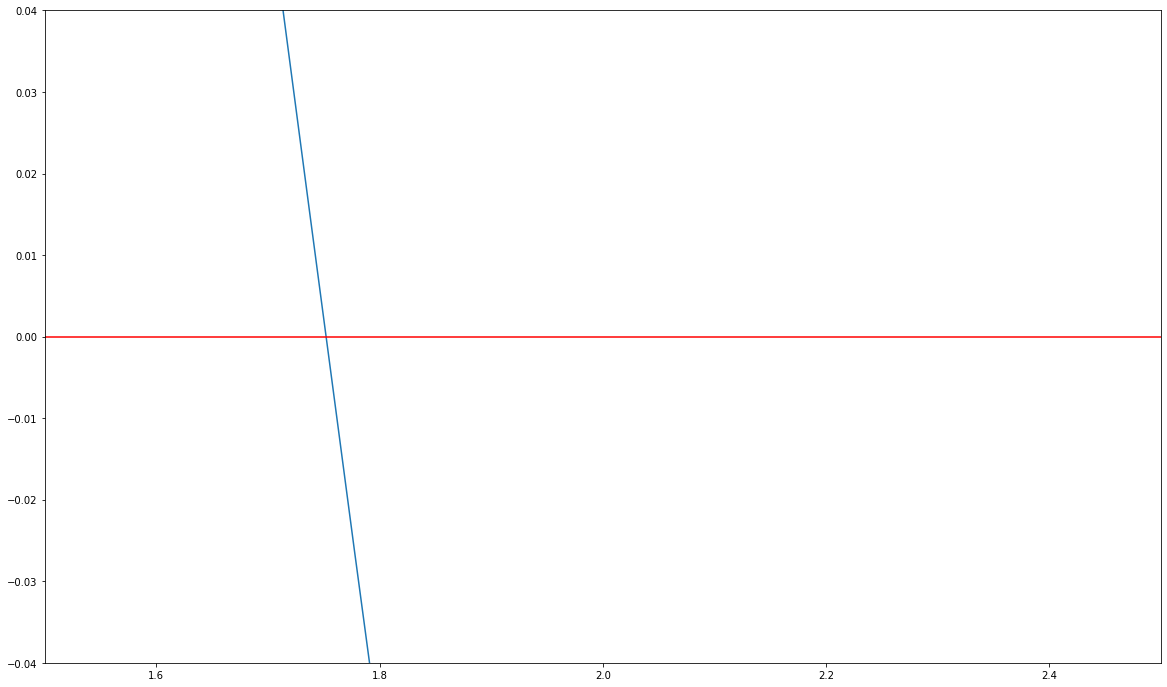

In [41]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy)
plt.axhline(0,color="red")
plt.ylim(-0.04,0.04)
plt.xlim(1.5,2.5)
plt.show()

dada la grafica anterior, podemos decir que tenemos raices entre [1.5,1.6], [2,2.1] y [2.1,2.3]

In [42]:
Raiz1_a = 1.5
Raiz1_b = 1.6
Raiz1 = opt.bisect(Poli_3raiz,Raiz1_a,Raiz1_b)

Raiz2_a = 2
Raiz2_b = 2.1
Raiz2 = opt.bisect(Poli_3raiz,Raiz2_a,Raiz2_b)

Raiz3_a = 2.1
Raiz3_b = 2.3
Raiz3 = opt.bisect(Poli_3raiz,Raiz3_a,Raiz3_b)

ValueError: f(a) and f(b) must have different signs

derivada del polinomio

In [ ]:
Deri_Poli = Poli_3raiz.deriv()
Valy_deri = Deri_Poli(Valx)

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy_deri)
plt.axhline(0,color="red")
plt.ylim(-1,1)
plt.xlim(1.5,2.5)
plt.show()

dada la grafica anterior, podemos decir que tenemos raices entre [1.6,1.8], [2,2.2]

In [ ]:
RaizDeri1_a = 1.6
RaizDeri1_b = 1.8
RaizDeri1 = opt.bisect(Deri_Poli,RaizDeri1_a,RaizDeri1_b)

RaizDeri2_a = 2
RaizDeri2_b = 2.2
RaizDeri2 = opt.bisect(Deri_Poli,RaizDeri2_a,RaizDeri2_b)

In [ ]:
Raices = np.array([Raiz1,Raiz2,Raiz3])
ValRaiz = Poli_3raiz(Raices)

derivada de la derivada (para verificar si es maximo o minimo)

In [ ]:
Deri_Deri_Poli = Deri_Poli.deriv()

In [ ]:
PuntosCriticos = np.array([RaizDeri1,RaizDeri2])
Valy_deri_deri = Deri_Deri_Poli(PuntosCriticos)
Valy_deri_deri

dado lo anterior, tenemos que el punto de la RaizDeri1 es un maximo y el de RaizDeri2 es un minimo (local si se toma la recta, ya que la función crece y decrece infinitamente en los extremos. De lo contrario globales para intervalos alrededor de las raices)

En el intervalo tomado [0,4], los maximos globales son los extremos, pero tomando unicamente los valores dentro de las raices que son las que presentan cambio de concavidad son:

graficando todos los resultados

Grafica del polinomio y sus dereivadas

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy,"blue",label="Polinomio")
plt.plot(Valx,Valy_deri,"green",label="1ra Derivada")
plt.plot(Valx,Deri_Deri_Poli(Valx),"red",label="2da Derivada")
plt.legend()
plt.show()

grafica del polinomio y sus raices

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy)
plt.plot(Raices,ValRaiz,"og")
plt.axhline(0,color="red")
plt.ylim(-0.04,0.04)
plt.xlim(1.5,2.5)
plt.show()


grafica de la derivada y sus raices

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(Valx,Valy_deri)
plt.plot(PuntosCriticos,Deri_Poli(PuntosCriticos),"og")
plt.axhline(0,color="red")
plt.ylim(-1,1)
plt.xlim(1.5,2.5)
plt.show()